# Q2 - Sentiment Analysis

In [58]:
# Part 1
# Your code here
import pandas as pd
df = pd.read_csv("Corona_NLP.csv")

In [59]:
# Part 2
# Your code here
df.tail(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
44948,3789.0,48741,Pakistan,16-03-2020,You never eaten the pigs cat dog or food from ...,Neutral
44949,3790.0,48742,"California, USA",16-03-2020,@calebmealer @thebradfordfile @realDonaldTrump...,Extremely Positive
44950,3791.0,48743,"Cincinnati, Ohio",16-03-2020,"Even though the Law Library is closed, ALL sub...",Positive
44951,3792.0,48744,Washington D.C.,16-03-2020,"With Gov Hogan's announcement that all bars, r...",Extremely Negative
44952,3793.0,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",Negative
44953,3794.0,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
44954,3795.0,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
44955,3796.0,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
44956,3797.0,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative
44957,3798.0,48750,"Arlington, Virginia",16-03-2020,I and @ForestandPaper members are committed to...,Extremely Positive


In [60]:
# Check and remove duplicate rows
initial_rows = len(df)
df.drop_duplicates(inplace=True)
remaining_rows = len(df)

# Calculate number of duplicates removed
duplicates_removed = initial_rows - remaining_rows
duplicates_removed

1

In [61]:
# Find unique values and their corresponding frequencies in the Location column
location_frequencies = df['Location'].value_counts()
location_frequencies.head(10)  # Display top 10 for preview

United States      603
London, England    568
London             565
New York, NY       429
Washington, DC     411
United Kingdom     355
Los Angeles, CA    314
India              283
UK                 246
USA                243
Name: Location, dtype: int64

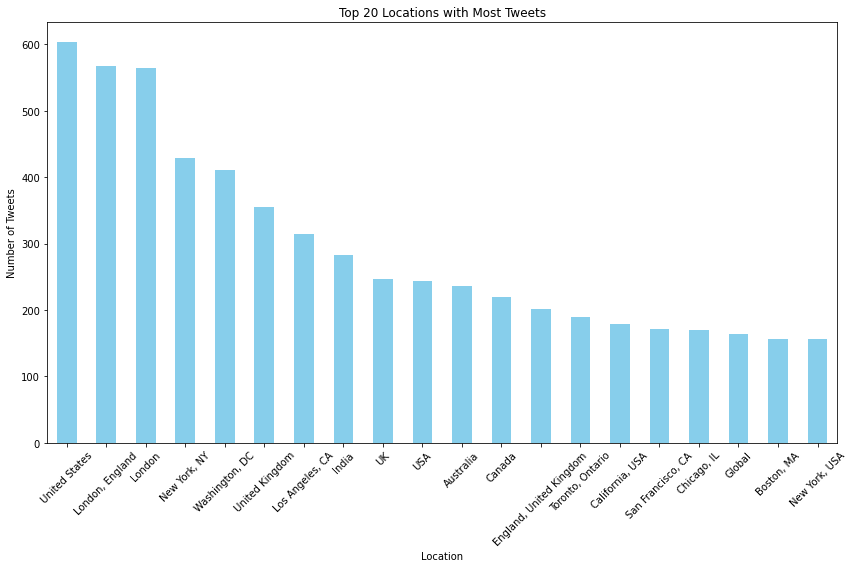

In [62]:
import matplotlib.pyplot as plt

# Plot the top 20 locations
plt.figure(figsize=(12, 8))
location_frequencies.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Locations with Most Tweets')
plt.xlabel('Location')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

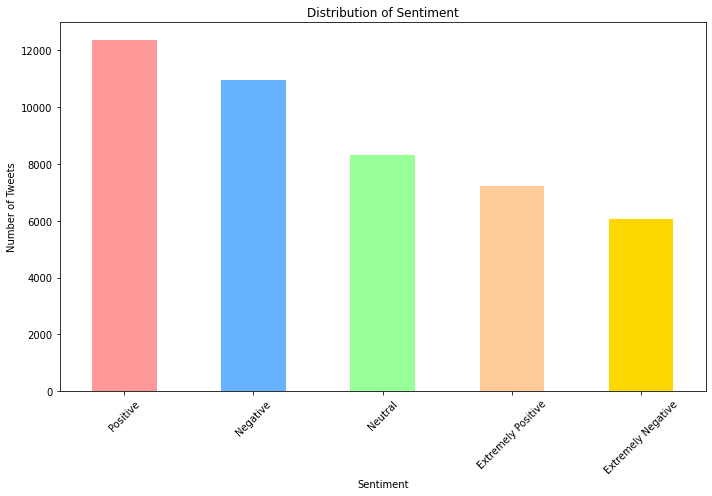

In [63]:
# Get the sentiment distribution
sentiment_distribution = df['Sentiment'].value_counts()

# Plot the sentiment distribution
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700']
plt.figure(figsize=(10, 7))
sentiment_distribution.plot(kind='bar', color=colors)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
# Combine the labels
df['Sentiment'] = df['Sentiment'].replace({"Extremely Negative": "Negative", "Extremely Positive": "Positive"})

# Display the updated distribution of sentiments
updated_sentiment_distribution = df['Sentiment'].value_counts()
updated_sentiment_distribution

Positive    19592
Negative    17031
Neutral      8330
Name: Sentiment, dtype: int64

In [65]:
df['OriginalTweet'].isnull().sum()

2

In [66]:
df['OriginalTweet'] = df['OriginalTweet'].fillna("")

In [67]:
df['OriginalTweet'].isnull().sum()

0

In [68]:
import re

def clean_text(tweet):
    # 1. Remove hyperlinks
    tweet = re.sub(r'http\S+', '', tweet)
    
    # 2. Remove hashtags
    tweet = re.sub(r'#\S+', '', tweet)
    
    # 3. Replace \n and \r with an empty space
    tweet = tweet.replace('\n', ' ').replace('\r', ' ')
    
    return tweet

In [70]:
# Apply the function to the 'OriginalTweet' column
df['Tweet'] = df['OriginalTweet'].apply(clean_text)

# Display the first few rows to verify the changes
df[['OriginalTweet', 'Tweet']].head()

,OriginalTweet,Tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,@MeNyrbie @Phil_Gahan @Chrisitv and and
1,advice Talk to your neighbours family to excha...,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...","Me, ready to go at supermarket during the out..."


In [71]:
# Part 3
# Sample code
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

# subpart 4 and 5
def tokenizing(tweet):
    #nltk.download()

    stopwords_english = stopwords.words('english')

    # 1 mark
    tokenizer =  TweetTokenizer() # create an instance of the toke
    new_tweet = tokenizer.tokenize(tweet) # tokenize the tweet
    
    clean_tweet = []

   # 1 mark
    for element in new_tweet:  # Going through every word in tokens list
        # our goal is to remove punctuation and stopwords
        # If the element is not a stopword or a punctuation sign, add it to clean_tweet
        if element.lower() not in stopwords_english and element not in string.punctuation:
            clean_tweet.append(element)

    


    return clean_tweet

In [72]:
df['Tweet'] = df['Tweet'].apply(tokenizing)

In [73]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799.0,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,"[@MeNyrbie, @Phil_Gahan, @Chrisitv]"
1,3800.0,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,"[advice, Talk, neighbours, family, exchange, p..."
2,3801.0,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,"[Coronavirus, Australia, Woolworths, give, eld..."
3,3802.0,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, ..., PLEASE, panic, ..."
4,3803.0,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,"[ready, go, supermarket, outbreak, I'm, parano..."


In [74]:
# Sample code
# Subpart 6
def stemming(tweet):
    # Instantiate stemming class
    stemmer = PorterStemmer()  # create an instance of a Porter stem

    # Create an empty list to store the stems
    stemmed_tweets = []

    for word in tweet:
        stem_word = stemmer.stem(word)  # stemming word
        stemmed_tweets.append(stem_word)  # append to the list

    return stemmed_tweets

In [76]:
df['Tweet'] = df['Tweet'].apply(stemming)

# Visualizing the first 5 rows
df[['OriginalTweet', 'Tweet']].head()

,OriginalTweet,Tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,"[@menyrbi, @phil_gahan, @chrisitv]"
1,advice Talk to your neighbours family to excha...,"[advic, talk, neighbour, famili, exchang, phon..."
2,Coronavirus Australia: Woolworths to give elde...,"[coronaviru, australia, woolworth, give, elder..."
3,My food stock is not the only one which is emp...,"[food, stock, one, empti, ..., pleas, panic, e..."
4,"Me, ready to go at supermarket during the #COV...","[readi, go, supermarket, outbreak, i'm, parano..."


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Join the tokenized and stemmed tweets to a single string for each row
df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join(x))

# Fit the vectorizer to the processed tweets
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Tweet'])

tfidf_matrix.shape

(44957, 38366)

In [78]:
# Part 4
# Sample code
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [82]:
df_subset = df[['Tweet', 'Sentiment']]
df_subset = df_subset.dropna(subset=['Sentiment'])
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_subset['Tweet'], df_subset['Sentiment'], 
                                                    test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((35962,), (8991,))

In [83]:

X_train_transformed = tfidf_vectorizer.fit_transform(X_train)
X_test_transformed = tfidf_vectorizer.transform(X_test)

# Instantiate and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_transformed, y_train)

# Predict the sentiment for the test data
y_pred = logreg.predict(X_test_transformed)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8035813591369146

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.81      0.82      0.82      3385
     Neutral       0.76      0.64      0.69      1682
    Positive       0.82      0.86      0.84      3924

    accuracy                           0.80      8991
   macro avg       0.79      0.77      0.78      8991
weighted avg       0.80      0.80      0.80      8991



The model achieves an accuracy of 80% which is a very good performance given the complexity of the sentiment analysis. Overall, he model demonstrates a robust performance, especially in distinguishing positive and negative sentiments. However, there's potential for improvement in classifying neutral tweets.